In [52]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1.读取数据

In [53]:
data = pd.read_csv('Income1.csv')

## 2.数据预处理，类型转换
array(30,)->array(30,1)->tensor(30,0)

In [54]:
data.Education.values

array([10.        , 10.40133779, 10.84280936, 11.24414716, 11.64548495,
       12.08695652, 12.48829431, 12.88963211, 13.2909699 , 13.73244147,
       14.13377926, 14.53511706, 14.97658863, 15.37792642, 15.77926421,
       16.22073579, 16.62207358, 17.02341137, 17.46488294, 17.86622074,
       18.26755853, 18.7090301 , 19.11036789, 19.51170569, 19.91304348,
       20.35451505, 20.75585284, 21.15719064, 21.59866221, 22.        ])

In [55]:
from torch import nn

In [131]:
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [132]:
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

## 3.分解写法

In [124]:
# 对应model = nn.Linear(1, 1)
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [125]:
w,b

(tensor([0.3980], requires_grad=True), tensor([0.], requires_grad=True))

In [126]:
learning_rate = 0.0001

In [127]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        # 计算损失
        loss = (y - y_pred).pow(2).mean()
        # 重置梯度
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        # 反向传播
        loss.backward()  
        with torch.no_grad():
            # 不跟踪以下运算
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate  

In [128]:
w

tensor([4.9747], requires_grad=True)

In [129]:
b

tensor([-28.3715], requires_grad=True)

## 4.图表展示

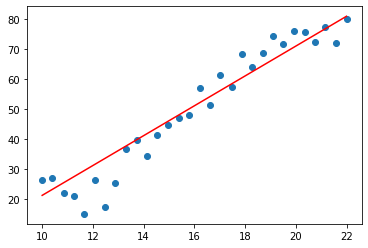

In [130]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (X*w+b).data.numpy(), c='r')